In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings('ignore')


# Exploratory Data Analysis

In [2]:
df = pd.read_csv('cleaned_full_transactions_data_south_africa.csv')

In [3]:
df = df.copy()

In [4]:
df.shape

(12858754, 36)

In [5]:
df.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,description,current_age,retirement_age,birth_year,birth_month,gender,address,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,is_fraud
0,7475327,2022-02-19 05:51:55,1556,2972,1386.00,Swipe Transaction,59935,Kimberley,Northern Cape,8300.0,5499.0,NaN,Visa,Prepaid,4155851339932589,07/2025,306,YES,2,990,05/2008,2008,No,Miscellaneous Food Stores,30,67,1989,7,Female,"405 Pretoria Street, Johannesburg",426222,868986,1982754,740,4,No
1,7475328,2023-01-13 02:58:58,561,4575,262.26,Swipe Transaction,67570,Pietermaritzburg,KwaZulu-Natal,3200.0,5311.0,NaN,Mastercard,Credit,5907662885505649,07/2026,438,YES,1,163800,09/2005,2015,No,Department Stores,48,67,1971,6,Male,"374 Voortrekker Road, Bloemfontein",325368,663354,2018502,834,5,No
2,7475329,2024-07-03 23:41:24,1129,102,1440.00,Swipe Transaction,27092,Port Elizabeth,Eastern Cape,6000.0,4829.0,NaN,Visa,Debit,4733501655657995,10/2026,256,YES,1,266436,01/2006,2008,No,Money Transfer,49,65,1970,4,Male,"146 Voortrekker Road, Gqeberha",304092,620082,657720,686,3,No
3,7475331,2022-06-12 09:33:41,430,2860,3600.00,Swipe Transaction,27092,Bloemfontein,Free State,9300.0,4829.0,NaN,Visa,Debit,4194472594023740,11/2026,54,NO,2,677412,05/2004,2006,No,Money Transfer,52,67,1967,5,Female,"573 Durban Road, East London",471024,960300,2316168,685,5,NaN
4,7475332,2023-08-26 10:05:48,848,3915,835.38,Swipe Transaction,13051,Polokwane,Limpopo,700.0,5813.0,NaN,Visa,Debit,4969200944415115,01/2025,120,YES,1,344034,07/2009,2014,No,Drinking Places (Alcoholic Beverages),51,69,1968,5,Male,"944 Church Street, East London",603522,1230516,1731276,711,2,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12858754 entries, 0 to 12858753
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   transaction_id         int64  
 1   date                   object 
 2   client_id              int64  
 3   card_id                int64  
 4   amount                 float64
 5   use_chip               object 
 6   merchant_id            int64  
 7   merchant_city          object 
 8   merchant_state         object 
 9   zip                    float64
 10  mcc                    float64
 11  errors                 object 
 12  card_brand             object 
 13  card_type              object 
 14  card_number            int64  
 15  expires                object 
 16  cvv                    int64  
 17  has_chip               object 
 18  num_cards_issued       int64  
 19  credit_limit           int64  
 20  acct_open_date         object 
 21  year_pin_last_changed  int64  
 22  card_on_dark_web

In [11]:
df.isnull().sum()

transaction_id                  0
date                            0
client_id                       0
card_id                         0
amount                          0
use_chip                        0
merchant_id                     0
merchant_city                   0
merchant_state                  0
zip                             0
mcc                             0
errors                   12654526
card_brand                      0
card_type                       0
card_number                     0
expires                         0
cvv                             0
has_chip                        0
num_cards_issued                0
credit_limit                    0
acct_open_date                  0
year_pin_last_changed           0
card_on_dark_web                0
description                     0
current_age                     0
retirement_age                  0
birth_year                      0
birth_month                     0
gender                          0
address       

In [12]:
df['errors'] = df['errors'].fillna('NaN')


Target Variable Analysis (is_fraud)

In [13]:
df['is_fraud'].value_counts()

is_fraud
No     8602717
Yes      12816
Name: count, dtype: int64

In [14]:
df['is_fraud'].value_counts(normalize=True)

is_fraud
No     0.998512
Yes    0.001488
Name: proportion, dtype: float64

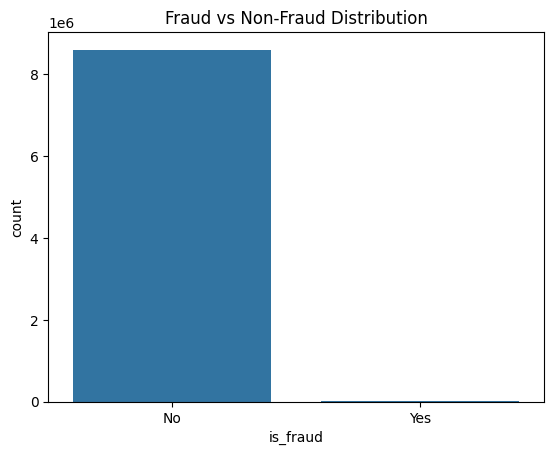

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


Missing Values Analysis

In [16]:
missing_pct = df.isna().mean().sort_values(ascending=False)
missing_pct[missing_pct > 0]

is_fraud    0.329987
dtype: float64

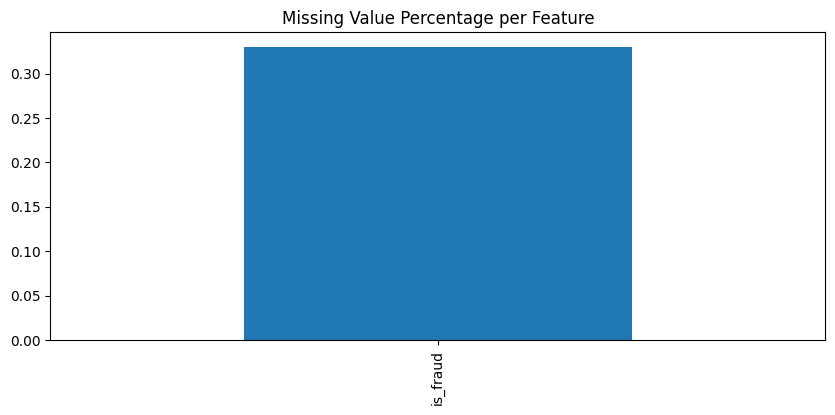

In [17]:
missing_pct[missing_pct > 0].plot(kind='bar', figsize=(10,4))
plt.title("Missing Value Percentage per Feature")
plt.show()


Date & Time Understanding

Convert Date Columns

In [19]:
df['date'] = pd.to_datetime(df['date'])
df['acct_open_date'] = pd.to_datetime(df['acct_open_date'], errors='coerce')
df['expires'] = pd.to_datetime(df['expires'], errors='coerce')
df

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,description,current_age,retirement_age,birth_year,birth_month,gender,address,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,is_fraud
0,7475327,2022-02-19 05:51:55,1556,2972,1386.00,Swipe Transaction,59935,Kimberley,Northern Cape,8300.0,5499.0,NaN,Visa,Prepaid,4155851339932589,2025-07-01,306,YES,2,990,2008-05-01,2008,No,Miscellaneous Food Stores,30,67,1989,7,Female,"405 Pretoria Street, Johannesburg",426222,868986,1982754,740,4,No
1,7475328,2023-01-13 02:58:58,561,4575,262.26,Swipe Transaction,67570,Pietermaritzburg,KwaZulu-Natal,3200.0,5311.0,NaN,Mastercard,Credit,5907662885505649,2026-07-01,438,YES,1,163800,2005-09-01,2015,No,Department Stores,48,67,1971,6,Male,"374 Voortrekker Road, Bloemfontein",325368,663354,2018502,834,5,No
2,7475329,2024-07-03 23:41:24,1129,102,1440.00,Swipe Transaction,27092,Port Elizabeth,Eastern Cape,6000.0,4829.0,NaN,Visa,Debit,4733501655657995,2026-10-01,256,YES,1,266436,2006-01-01,2008,No,Money Transfer,49,65,1970,4,Male,"146 Voortrekker Road, Gqeberha",304092,620082,657720,686,3,No
3,7475331,2022-06-12 09:33:41,430,2860,3600.00,Swipe Transaction,27092,Bloemfontein,Free State,9300.0,4829.0,NaN,Visa,Debit,4194472594023740,2026-11-01,54,NO,2,677412,2004-05-01,2006,No,Money Transfer,52,67,1967,5,Female,"573 Durban Road, East London",471024,960300,2316168,685,5,NaN
4,7475332,2023-08-26 10:05:48,848,3915,835.38,Swipe Transaction,13051,Polokwane,Limpopo,700.0,5813.0,NaN,Visa,Debit,4969200944415115,2025-01-01,120,YES,1,344034,2009-07-01,2014,No,Drinking Places (Alcoholic Beverages),51,69,1968,5,Male,"944 Church Street, East London",603522,1230516,1731276,711,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12858749,23209463,2022-05-16 02:17:24,597,4540,126.00,Online Transaction,51397,ONLINE,Unknown,0.0,5651.0,NaN,Discovery,Credit,6243205419809888,2026-04-01,822,YES,2,1374174,2003-09-01,2014,No,Family Clothing Stores,72,66,1948,1,Male,"499 Church Street, Gqeberha",930456,1170990,30168,736,6,No
12858750,23209464,2023-07-23 01:05:29,1508,3279,593.46,Chip Transaction,43293,Cape Town,Western Cape,8000.0,5499.0,NaN,Visa,Debit,4791458576097827,2025-01-01,347,YES,2,218700,2004-06-01,2008,No,Miscellaneous Food Stores,66,69,1953,4,Female,"495 Durban Road, Cape Town",344250,701982,1167750,747,4,NaN
12858751,23209465,2023-05-03 10:17:19,1727,4918,284.04,Online Transaction,18563,ONLINE,Unknown,0.0,4121.0,NaN,Mastercard,Debit,5293806793063413,2024-09-01,862,YES,2,487188,2018-09-01,2018,No,Taxicabs and Limousines,46,67,1973,10,Female,"323 Main Road, East London",430506,877716,2577744,771,6,No
12858752,23209466,2022-05-15 15:12:30,467,4278,812.88,Chip Transaction,31893,Cape Town,Western Cape,8000.0,5311.0,NaN,Visa,Credit,4769678222931248,2025-08-01,619,YES,2,261000,2008-08-01,2010,No,Department Stores,38,65,1981,9,Male,"280 Victoria Road, Pretoria",395784,806958,376308,705,3,NaN


Transaction Volume Over Time

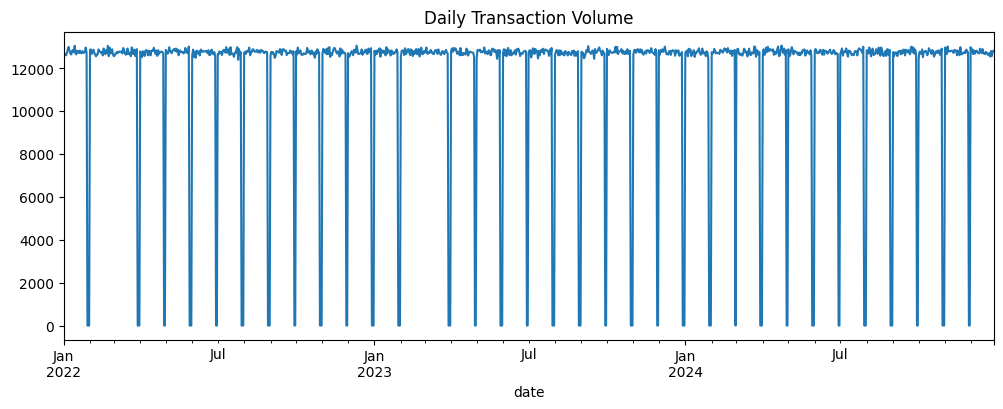

In [20]:
df.set_index('date').resample('D').size().plot(figsize=(12,4))
plt.title("Daily Transaction Volume")
plt.show()


Amount Distribution Analysis

Overall Distribution

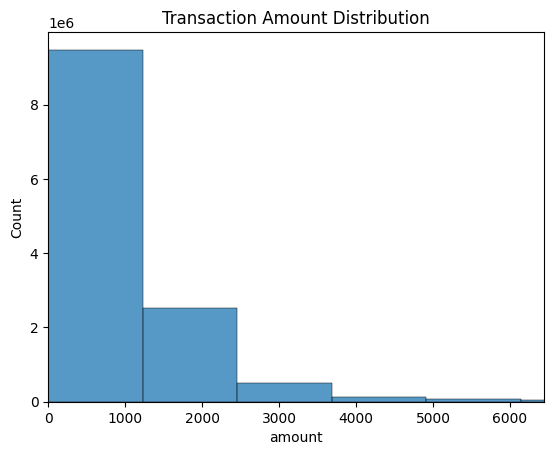

In [23]:
sns.histplot(df['amount'], bins=100)
plt.xlim(0, df['amount'].quantile(0.99))
plt.title("Transaction Amount Distribution")
plt.show()


Fraud vs Non-Fraud

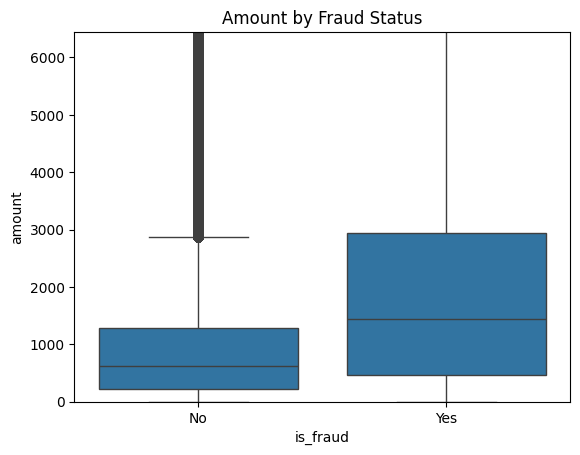

In [24]:
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.ylim(0, df['amount'].quantile(0.99))
plt.title("Amount by Fraud Status")
plt.show()


Categorical Features vs Fraud

Helper Function

In [25]:
def fraud_rate(col):
    return df.groupby(col)['is_fraud'].mean().sort_values(ascending=False)


Eg

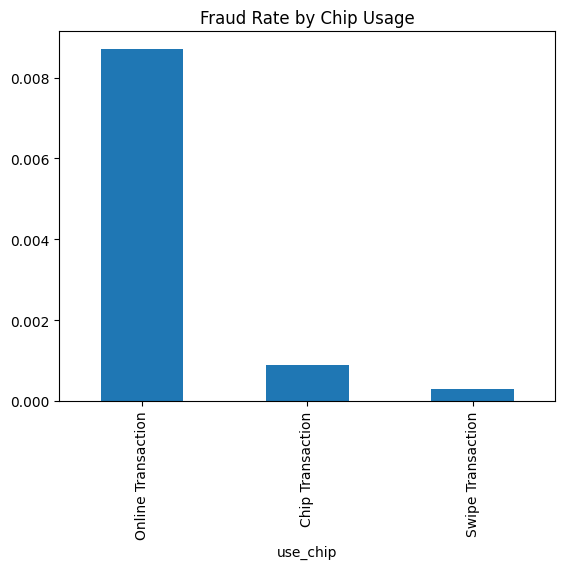

In [27]:
# Convert is_fraud to numeric: 1 for fraud, 0 for non-fraud
df['is_fraud_numeric'] = df['is_fraud'].map({'Yes': 1, 'No': 0})

def fraud_rate_numeric(col):
	return df.groupby(col)['is_fraud_numeric'].mean().sort_values(ascending=False)

fraud_rate_numeric('use_chip').plot(kind='bar')
plt.title("Fraud Rate by Chip Usage")
plt.show()


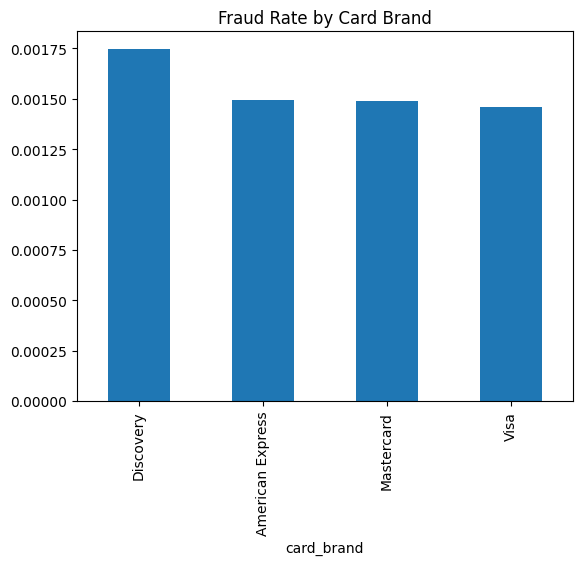

In [29]:
fraud_rate('card_brand').plot(kind='bar')
plt.title("Fraud Rate by Card Brand")
plt.show()

Velocity (Transaction Speed)

In [32]:
df['time_since_last_txn'] = (
    df.groupby('card_id')['date']
      .diff()
      .dt.total_seconds()
)


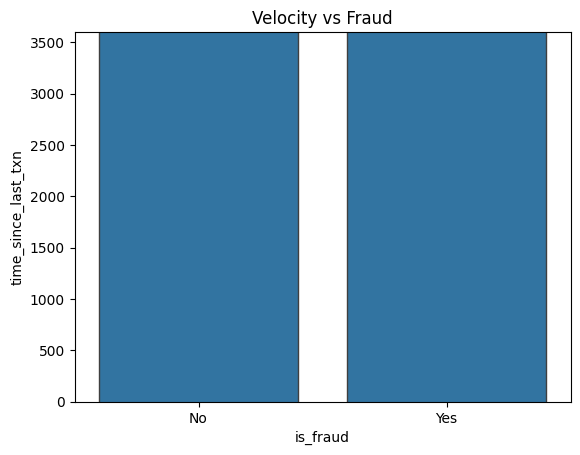

In [34]:
sns.boxplot(x='is_fraud', y='time_since_last_txn', data=df)
plt.ylim(0, 3600)
plt.title("Velocity vs Fraud")
plt.show()


Customer Financial Risk

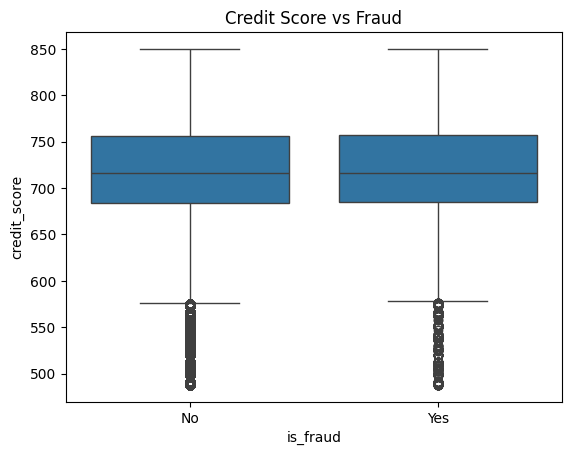

In [35]:
sns.boxplot(x='is_fraud', y='credit_score', data=df)
plt.title("Credit Score vs Fraud")
plt.show()


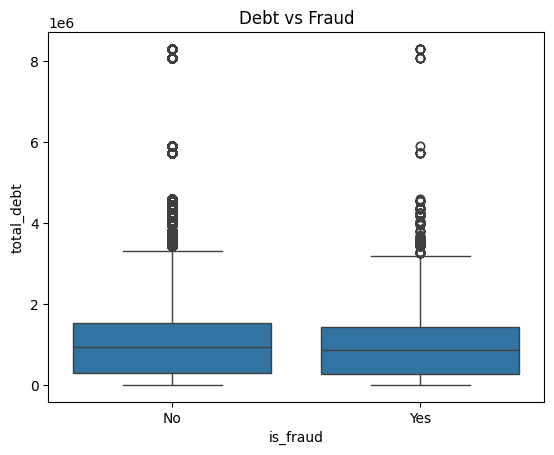

In [36]:
sns.boxplot(x='is_fraud', y='total_debt', data=df)
plt.title("Debt vs Fraud")
plt.show()


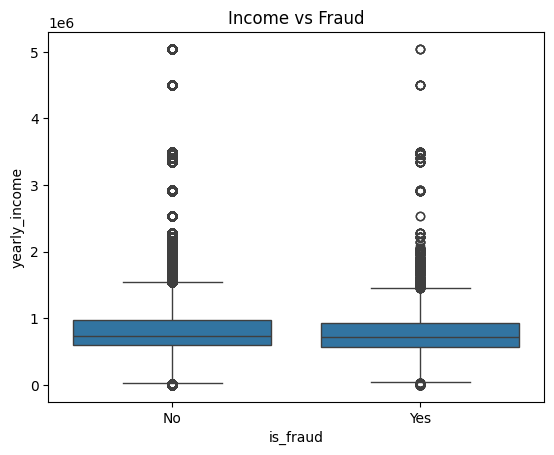

In [37]:
sns.boxplot(x='is_fraud', y='yearly_income', data=df)
plt.title("Income vs Fraud")
plt.show()


Correlation Analysis (Numeric Only)

In [39]:
num_df = df.select_dtypes(include=np.number)

corr = num_df.corr()['is_fraud_numeric'].sort_values(ascending=False)
corr


is_fraud_numeric         1.000000
amount                   0.040660
num_credit_cards         0.006683
merchant_id              0.005621
current_age              0.004321
credit_score             0.000998
cvv                      0.000499
retirement_age           0.000477
transaction_id           0.000414
card_number              0.000233
year_pin_last_changed   -0.000023
num_cards_issued        -0.000114
time_since_last_txn     -0.000123
birth_month             -0.000295
client_id               -0.000382
card_id                 -0.000732
total_debt              -0.003261
per_capita_income       -0.003566
yearly_income           -0.003973
birth_year              -0.004330
credit_limit            -0.006192
mcc                     -0.015009
zip                     -0.026959
is_new_state            -0.037784
Name: is_fraud_numeric, dtype: float64

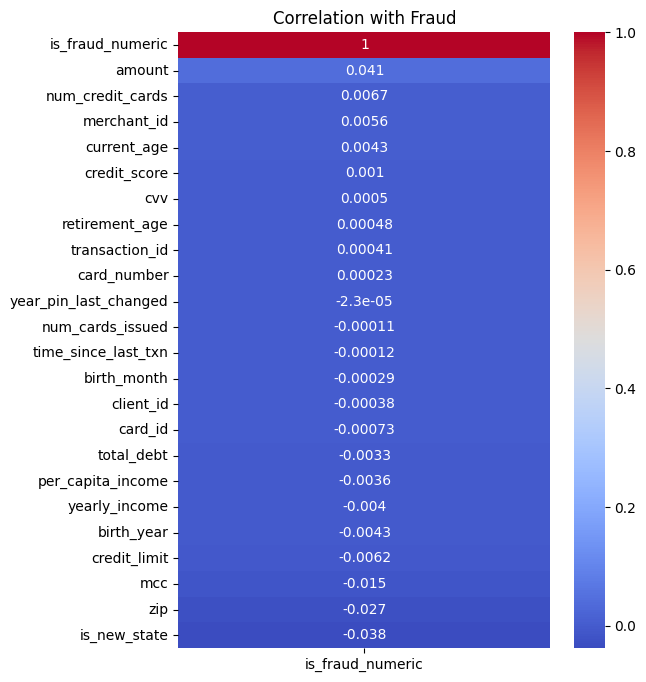

In [40]:
plt.figure(figsize=(6,8))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation with Fraud")
plt.show()


Outlier Detection

In [41]:
df['amount'].describe(percentiles=[0.95, 0.99, 0.999])


count    1.285875e+07
mean     9.565806e+02
std      1.359393e+03
min      0.000000e+00
50%      6.265800e+02
95%      2.774340e+03
99%      6.444000e+03
99.9%    1.606666e+04
max      1.227636e+05
Name: amount, dtype: float64

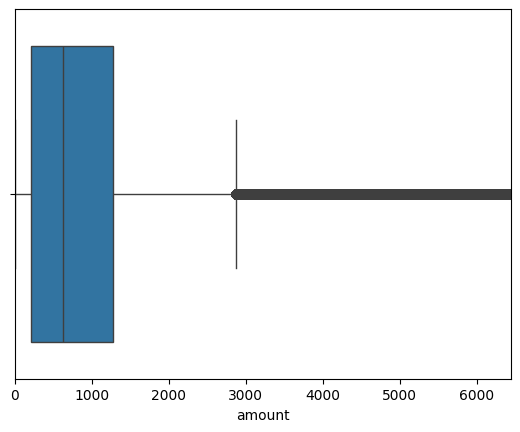

In [42]:
sns.boxplot(x=df['amount'])
plt.xlim(0, df['amount'].quantile(0.99))
plt.show()


TEST 2 — Chip Mismatch Increases Fraud
EDA Finding

Chip mismatch had higher fraud rates.

Hypotheses

H₀: Fraud independent of chip mismatch

H₁: Fraud depends on chip mismatch

Test: Chi-Square

In [45]:
from scipy.stats import chi2_contingency

cont_chip = pd.crosstab(df['use_chip'], df['is_fraud_numeric'])

chi2_chip, p_chip, _, _ = chi2_contingency(cont_chip)

p_chip


np.float64(0.0)

TEST 4 — Fraud Has Higher Transaction Velocity
EDA Finding

Fraud occurs in bursts (short time gaps).

Hypotheses

H₀: Time between transactions is the same

H₁: Fraud transactions occur faster

Test: Mann–Whitney U (one-sided)

In [47]:
from scipy.stats import mannwhitneyu

fraud_vel = df.loc[df.is_fraud == 1, 'time_since_last_txn'].dropna()
nonfraud_vel = df.loc[df.is_fraud == 0, 'time_since_last_txn'].dropna()

stat_vel, p_vel = mannwhitneyu(
    fraud_vel,
    nonfraud_vel,
    alternative='less'
)

p_vel



np.float64(nan)

TEST 6 — Risky Merchants Have Higher Fraud
EDA Finding

Certain merchants/MCCs had extreme fraud rates.

Hypotheses

H₀: Merchant fraud rate equals overall fraud rate

H₁: Merchant fraud rate is higher

In [51]:
from scipy.stats import ttest_1samp

merchant_rates = (
    df.groupby('merchant_id')['is_fraud_numeric'].mean()
)

overall_rate = df['is_fraud_numeric'].mean()

stat_merch, p_merch = ttest_1samp(
    merchant_rates,
    overall_rate
)

p_merch


np.float64(nan)